<h1>Importing the dataset</h1>

<p>the dataset does not have any name for its columns, so we name the columns based on the name file, it can be found in readme file</p>

In [3]:
import pandas as pd
import numpy as np
columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv(r"C:\Users\Legion\Desktop\Python\Datasets\Abalone Data Set\abalone.data",header = None,names = columns)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<h1>Adding Age column</h1>

In the dataset description, it is mentioned that Rings + 1.5 gives us the Age. So we change the <i>Rings</i> column to Age column by adding 1.5 to all the values in this column

In [4]:
df['Age'] = df['Rings'] + 1.5
df.drop('Rings',axis = 'columns',inplace = True)

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


<h1>Checking for the missing values</h1>

We now check if there is any missing value in the dataset

In [5]:
def is_missing():
    for count in df.isna().sum():
        if count>0:
            return True
    return False

if is_missing:
    print('We have some values missing')
else:
    print('No missing data')

We have some values missing


<h1>Categorical values to Numerical values</h1>

In [6]:
from sklearn.preprocessing import OneHotEncoder

#creating an instance of the OneHotEncoder
he = OneHotEncoder()
#reshaping the column
column = np.asarray(df.Sex).reshape(-1,1)
#fit and transform the data
transformed = he.fit_transform(column)
#creating a new dataset, generated from the Sex column values
ans = pd.DataFrame(transformed.toarray(),columns = ['Female','Infant','Male'])

#concating two datasets
df = pd.concat([df,ans],axis = 'columns')
#droping the Sex column
# df.drop('Sex',axis = 'columns',inplace = True)

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Female,Infant,Male
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0.0,0.0,1.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0.0,0.0,1.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1.0,0.0,0.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0.0,0.0,1.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0.0,1.0,0.0


<h1>The Correlation Matrix</h1>

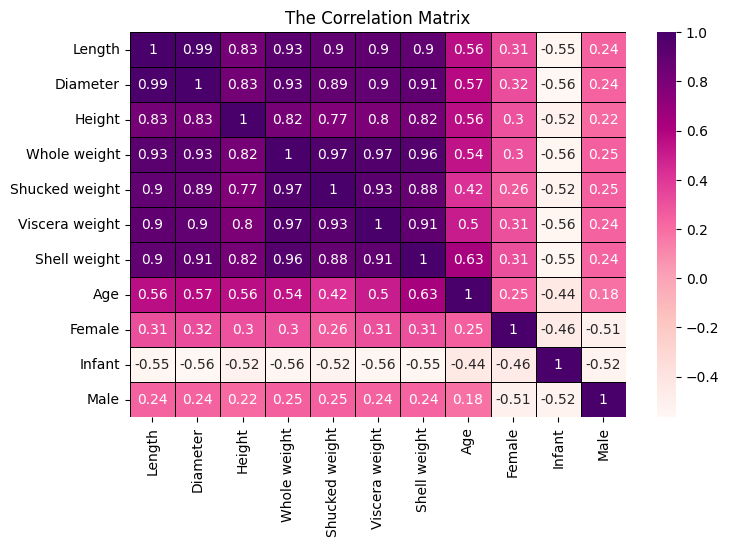

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))
sns.heatmap(df.corr(),cmap = 'RdPu',annot = True,linewidth = 0.5,linecolor = 'black')
plt.title('The Correlation Matrix')
plt.show()

<h1>Plotting some information regarding the dataset</h1>

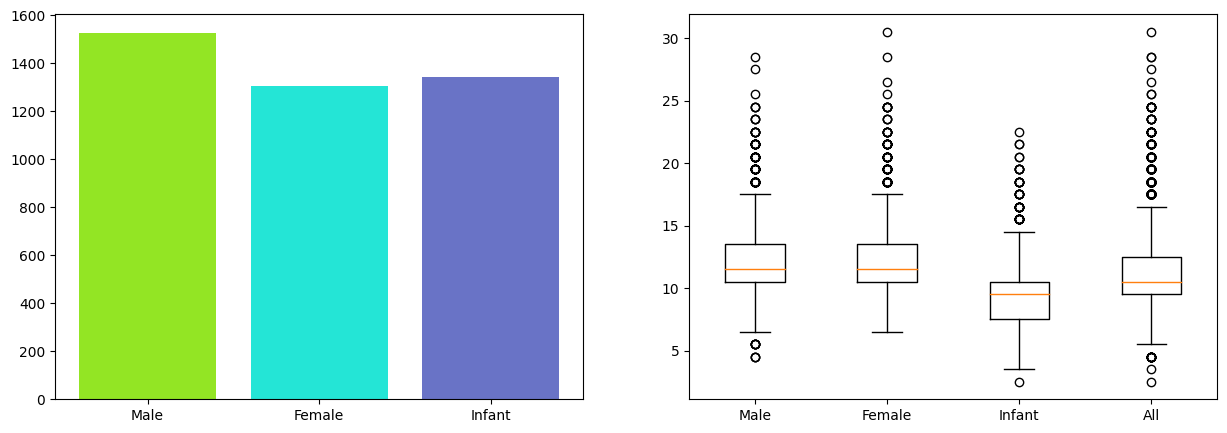

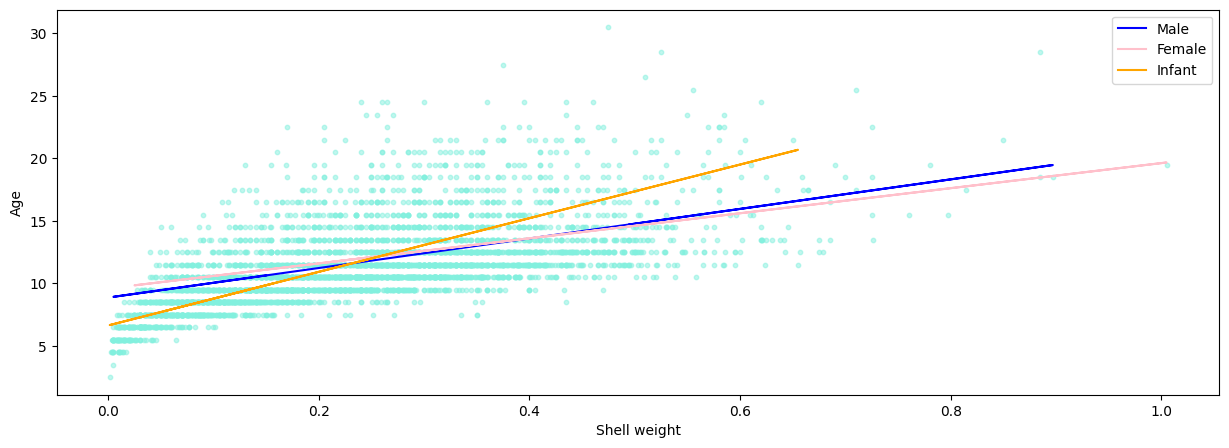

In [8]:
f, axes = plt.subplots(1,2,figsize = (15,5))

Sexes = ['Male','Female','Infant']
infos = {}
count = {}
for sex in Sexes:
    info = df.loc[df[sex] == 1]
    info_1 = info['Age'].values
    
    infos[sex] = info_1
    count[sex] = len(info.index)

    
axes[0].bar(count.keys(),count.values(),color = ['#93E524','#24E5D6','#6973C6'])

infos['All'] = df['Age'].values
axes[1].boxplot(infos.values())
axes[1].set_xticklabels(infos.keys())


f,ax = plt.subplots(figsize = (15,5))
def func(X):
    global lr
    jvb = []
    coef,intercept = lr.coef_,lr.intercept_
    for value in X:
        value_ = coef*value + intercept
        jvb.append(value_)
        
    return jvb

from sklearn.linear_model import LinearRegression
Sexes = ['Male','Female','Infant']
color = ['blue','pink','orange']
     
for i in range(len(Sexes)):
    Sex = Sexes[i]
    lr = LinearRegression()
    ds = df.loc[df[Sex] == 1]
    X = np.array(ds['Shell weight']).reshape(-1,1)
    lr.fit(X,ds['Age'])
    ax.plot(X,func(X),color = color[i],label = Sex)
    
ax.scatter(df['Shell weight'],df['Age'],color = '#82F0DE', alpha = 0.5, s = 10)
ax.set(xlabel = 'Shell weight', ylabel = 'Age')
plt.legend()

plt.show()

<p>We can get that the maximum age for an infant would be around 10 years old. After this age, they would be considered either Male or Female</p>
<p>Also the Shell weight which is the most important feature for age, increases much more in female ones than male ones as it's plotted above</p>

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Sex'])
df['Sex'] = le.transform(df['Sex'])

<h1>Choosing the features for our train set</h1>

<p>We select columns which have the most correlation value with age column</p>

In [10]:
corr = dict(df.corr()['Age'])
columns = []
for key in corr:
    if corr[key]>=0.5 and key!='Age':
        columns.append(key)
        
X,y = df.drop(['Age'] + Sexes, axis = 'columns'),df['Age']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.25,shuffle = True,random_state = 11)

<h1>Using the MinMaxScaler to scaler our train and test set</h1>

<p>We fit and transformt the train set but just use transform class for test set to avoid any data leakage</p>`

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

<h1>Importing ML Models</h1>

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.metrics import r2_score

rfc = RandomForestRegressor(n_estimators = 100, max_depth = 5,criterion = 'friedman_mse')
svr = SVR(kernel = 'poly',degree = 3)
ls = Lasso(alpha = 0.001)
lr = LinearRegression()

tf_sq = Sequential()
#input layer
tf_sq.add(Dense(8))
#hidden layers
tf_sq.add(Dense(8))
tf_sq.add(Dense(8))
tf_sq.add(Dense(8))
tf_sq.add(Dense(8))
#output layer
tf_sq.add(Dense(1))

tf_sq.compile(optimizer = 'adam',loss = 'mse')

<h1>Training the Models</h1>

In [13]:
train_score, test_score = {},dict()
models = [rfc,svr,ls,lr,tf_sq]
for model in models:
    
    name = (type(model).__name__)
    
    if name != 'Sequential':
        
        model.fit(xtrain,ytrain)
        #accuracy on training set
        tr_sc = model.score(xtrain,ytrain)
        train_score[name] = tr_sc*100
        #accuracy on test set
        te_sc = model.score(xtest,ytest)
        test_score[name] = te_sc*100
    
    else:
        model.fit(xtrain,ytrain,batch_size = 128,epochs = 400)
        
        tr_sc = r2_score(ytrain,model.predict(xtrain))*100
        te_sc = r2_score(ytest,model.predict(xtest))*100
        
        train_score[name] = tr_sc
        test_score[name] = te_sc

Epoch 1/400
25/25 [==============================] - 1s 984us/step - loss: 136.4908
Epoch 2/400
25/25 [==============================] - 0s 821us/step - loss: 102.3053
Epoch 3/400
25/25 [==============================] - 0s 791us/step - loss: 50.3815
Epoch 4/400
25/25 [==============================] - 0s 746us/step - loss: 11.4030
Epoch 5/400
25/25 [==============================] - 0s 753us/step - loss: 8.6666
Epoch 6/400
25/25 [==============================] - 0s 747us/step - loss: 8.1497
Epoch 7/400
25/25 [==============================] - 0s 744us/step - loss: 7.9514
Epoch 8/400
25/25 [==============================] - 0s 799us/step - loss: 7.7961
Epoch 9/400
25/25 [==============================] - 0s 755us/step - loss: 7.6717
Epoch 10/400
25/25 [==============================] - 0s 748us/step - loss: 7.5801
Epoch 11/400
25/25 [==============================] - 0s 751us/step - loss: 7.4702
Epoch 12/400
25/25 [==============================] - 0s 772us/step - loss: 7.3878
Epoch 1

<h1>Creating a dataframe for accuracy scores of the models on train and test set</h1>

In [14]:
acc_df = pd.DataFrame({'Train set':train_score.values(),
                        'Test set':test_score.values()},
                      index = [type(model).__name__ for model in models])
acc_df

,Train set,Test set
RandomForestRegressor,58.945481,54.227088
SVR,46.924679,50.424192
Lasso,51.239456,56.679875
LinearRegression,51.339261,56.882133
Sequential,49.583008,55.479340


<h1>Plotting the Accuracy of the models</h1>

<p> As it is shown above, the best accuracy is obtained by <b>RandomForestRegressor</b> Model which has about <i>59%</i> and <i>55% accuracy</i> on the <i>train and test set respectively</i></p>

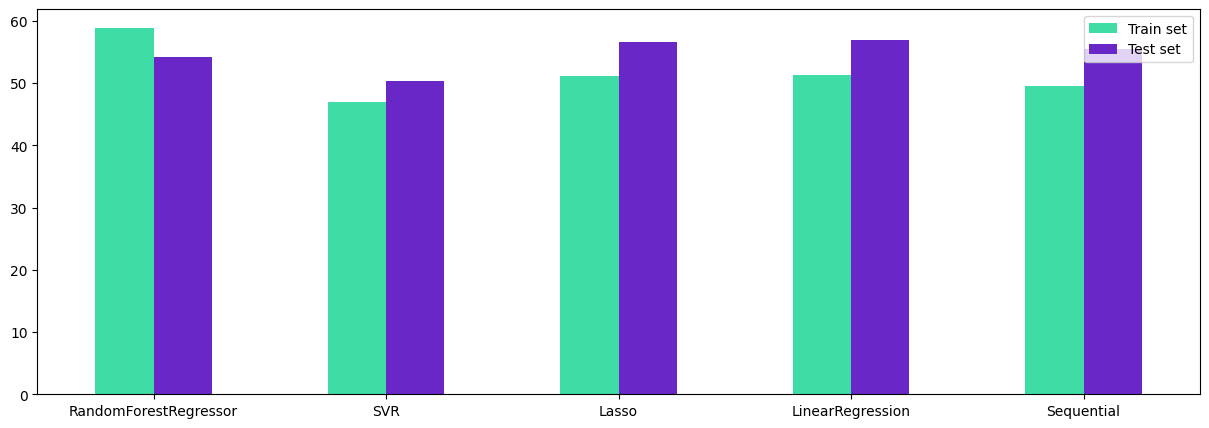

In [15]:
acc_df.plot.bar(color = {'Train set':'#3FDCA5',
                        'Test set':'#6927C8'},rot = False,
               figsize = (15,5))
plt.show()